# SPBD 2022
## Air Quality Monitoring (airborne particulate matter)
-- version Nov 2 
 - draft version (incomplete dataset)




The goal of this project is to analyze data provided by a set of air quality sensors [sds011](https://aqicn.org/sensor/sds011/pt/) belonging
to a global sensor network spanning the globe, named [Sensor.Community](https://sensor.community/en/).

While the data spans the globe, the sensors present in the dataset to be processed are limited to Portugal, France, Spain and Germany. Each sensor provides two values: measuring particles less than 10 µm (P1) and less than 2.5 µm (P2) in μg/m³.

The sensor data is limited to 2020 and is organized in separate CSV files, stored in folders, one for each month and one file per day.


Each CSV file has the following schema:

sensor_id | sensor_type | latitude | longitude | timestamp | P1 | P2
----------|-------------|----------|-----------|-----------|----|---
string  | string | float | float| timestamp | float | float

The root folder of the dataset can be downloaded from a [Google Drive folder](https://drive.google.com/drive/folders/1rJwbgPGf2ZNJ_nV-5hu2cq75N82mMQ2E?usp=share_link)

(Note: Presently, the full dataset is still incomplete)

A [secondary dataset](https://raw.githubusercontent.com/smduarte/spbd-2223/main/proj/sensors_all.json) in the form of a [JSON](https://www.w3schools.com/python/python_json.asp) is also provided. This data can be used
to map a given sensor to is location, namely, the country and city where
it resides.

The goal of the assignment is to solve the following questions:

### Q3 - Lockdown detection
The full dataset covers periods of population confinements due to Covid 19. Can you find a statistical signal in the data showing air quality improvement coinciding with confinement periods in the countries covered by the data?

**Requirement**: For this question, use a single framework of your choice, of those studied.

## General Requeriments

1. Each question should answered in a separate Colab notebook, ready to run. 

## Grading Criteria 

1. Small bonus marks will be given if some kind of graphical output is provided to present the results;
2. Grading will also take into account the general clarity of the programming and of the presentation of each report (notebook).


### Deadline

21th December 2022, 23h59.

For each day late, ***0.5 / day penalty***. Penalty accumulates until
the grade of the assignment reaches 8.0.

In [1]:
# @title Install PySpark
!pip install pyspark findspark --quiet
import findspark

findspark.init()
findspark.find()


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


'/Users/mgajek/Desktop/Nova 2022/SPBD/Practica/.sistemas_para_big_data/lib/python3.10/site-packages/pyspark'

In [23]:
import pandas as pd

df = pd.read_csv("2020-02/sds011-2020-02-14.csv", sep=";", header=None)
df.fillna(0, inplace=True)
print("reading", end=": ")
for day_number in range(15, 32):
    try:
        filename = f'2020-02/sds011-2020-02-{str(day_number).rjust(2, "0")}.csv'
        print(f"day {day_number}", end=", ")
        new_df = pd.read_csv(filename, sep=";", header=None)
        new_df.fillna(0, inplace=True)
        df = pd.concat([df, new_df])
    except FileNotFoundError:
        print(f"No file with name {filename}")

print("writing final file")
df.to_csv("combined_metrics.csv", sep=";", index=False, header=False)
df.shape

df = pd.DataFrame()
print("reading", end=": ")
for day_number in range(1, 32):
    try:
        filename = f'2020-03/sds011-2020-03-{str(day_number).rjust(2, "0")}.csv'
        print(f"day {day_number}", end=", ")
        new_df = pd.read_csv(filename, sep=";", header=None)
        new_df.fillna(0, inplace=True)
        df = pd.concat([df, new_df])
    except FileNotFoundError:
        print(f"No file for day {day_number}", end=", ")

print("writing final file")
df.to_csv("combined_metrics.csv", sep=";", mode="a", index=False, header=False)
df.shape

df = pd.DataFrame()
print("reading", end=": ")
for day_number in range(1, 32):
    try:
        filename = f'2020-04/sds011-2020-04-{str(day_number).rjust(2, "0")}.csv'
        print(f"day {day_number}", end=", ")
        new_df = pd.read_csv(filename, sep=";", header=None)
        new_df.fillna(0, inplace=True)
        df = pd.concat([df, new_df])
    except FileNotFoundError:
        print(f"No file for day {day_number}", end=", ")

print("writing final file")
df.to_csv("combined_metrics.csv", sep=";", mode="a", index=False, header=False)
df.shape

reading: day 15, day 16, day 17, day 18, day 19, day 20, day 21, day 22, day 23, day 24, day 25, day 26, day 27, day 28, day 29, day 30, No file with name 2020-02/sds011-2020-02-30.csv
day 31, No file with name 2020-02/sds011-2020-02-31.csv
writing final file
reading: day 1, day 2, day 3, day 4, day 5, day 6, day 7, day 8, day 9, day 10, day 11, day 12, day 13, day 14, day 15, day 16, day 17, day 18, day 19, day 20, day 21, day 22, day 23, day 24, day 25, day 26, day 27, day 28, day 29, No file for day 29, day 30, day 31, writing final file
reading: day 1, day 2, day 3, day 4, day 5, day 6, day 7, day 8, day 9, 

/var/folders/5h/wgsr81414ml0pn7tnjhskzk80000gn/T/ipykernel_5634/2304991384.py:42: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(filename, sep=';', header=None)


day 10, 

/var/folders/5h/wgsr81414ml0pn7tnjhskzk80000gn/T/ipykernel_5634/2304991384.py:42: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df = pd.read_csv(filename, sep=';', header=None)


day 11, No file with name 2020-04/sds011-2020-04-11.csv
day 12, No file with name 2020-04/sds011-2020-04-12.csv
day 13, No file with name 2020-04/sds011-2020-04-13.csv
day 14, No file with name 2020-04/sds011-2020-04-14.csv
day 15, No file with name 2020-04/sds011-2020-04-15.csv
day 16, No file with name 2020-04/sds011-2020-04-16.csv
day 17, No file with name 2020-04/sds011-2020-04-17.csv
day 18, No file with name 2020-04/sds011-2020-04-18.csv
day 19, No file with name 2020-04/sds011-2020-04-19.csv
day 20, No file with name 2020-04/sds011-2020-04-20.csv
day 21, No file with name 2020-04/sds011-2020-04-21.csv
day 22, No file with name 2020-04/sds011-2020-04-22.csv
day 23, No file with name 2020-04/sds011-2020-04-23.csv
day 24, No file with name 2020-04/sds011-2020-04-24.csv
day 25, No file with name 2020-04/sds011-2020-04-25.csv
day 26, No file with name 2020-04/sds011-2020-04-26.csv
day 27, No file with name 2020-04/sds011-2020-04-27.csv
day 28, No file with name 2020-04/sds011-2020-04

(31338743, 7)

In [24]:
!wc -l combined_metrics.csv

 187506332 combined_metrics.csv


In [61]:
import pyspark
from operator import *
import numpy as np
import math
import pandas as pd
import json


def windowOverTwoWeeks(input):
    """
    input data in the format of:
      (country, city, week_number) | max_P1_of_week
    output will be a list of two elements with format of:
      key: (country, city, week_number),     values: (week_number, max_P1_of_week)
      key: (country, city, week_number + 1), values: (week_number, max_P1_of_week)
    """
    week_number_max_P1 = (input[0][2], input[1])

    return [
        (input[0], week_number_max_P1),
        ((input[0][0], input[0][1], input[0][2] + 1), week_number_max_P1),
    ]


def readLineValues(input):
    """
    input data in format of:
      >sensor_id< | sensor_type | latitude | longitude | >timestamp< | >P1< | P2
    output in format of:
      #sensor_id: str | (week_number: int, P1: float)
    """
    sensor_id = input[0]
    P1_measure = 0.0
    try:
        P1_measure = float(input[5])
        if math.isnan(P1_measure) or math.isinf(P1_measure):
            P1_measure = 0.0
    except:
        P1_measure = 0.0
    week_number = (
        int(input[4][5:7].lstrip("0")) * 6 + int(input[4][8:10].lstrip("0")) // 7
    )

    return sensor_id, (week_number, P1_measure)


def printDateFromWeekNumber(week_number):
    month = week_number // 6
    week_in_month = week_number - 6 * month + 1
    print(f"month {month}, week {week_in_month}", end=" | ")


sc = pyspark.SparkContext("local[*]")
try:
    # We strip the file in order to be able to treat each line
    sensor_data = sc.textFile("2020-0?/*.csv").map(lambda line: line.strip())

    # Split country in lines to get the values we need (sensor_id, country, city)
    countries = (
        sc.textFile("sensors_all.json")
        .map(lambda x: (json.loads(x)))
        .flatMap(lambda x: x)
        .map(lambda val: (val["sensor_id"], (val["country"], val["city"])))
    )
    # Get the sensor's reading data to join with locations
    sensors_over_week = (
        sensor_data.map(lambda line: line.split(";")).filter(
            lambda values: len(values) == 7
        )
        # >sensor_id< | sensor_type | latitude | longitude | >timestamp< | >P1< | P2
        .map(readLineValues)
    )

    # Join sensor values with countries and cities
    countries_sensors = sensors_over_week.join(countries)

    # We compute the pairwise difference between weeks' maximum P1 rating
    # sensor_id | ((week_number, P1), (country, city))
    P1_weekly_diffs = (
        countries_sensors.map(
            lambda values: ((*values[1][1], values[1][0][0]), values[1][0][1])
        )
        # (country, city, week_number) | P1
        .aggregateByKey(
            (0.0, 0),
            lambda acc, v: (acc[0] + v, acc[1] + 1),
            lambda acc1, acc2: (acc1[0] + acc2[0], acc1[1] + acc2[1]),
        )
        # (country, city, week_number) | (P1_sum, number_of_sensors)
        .mapValues(lambda val: val[0] / val[1])
        # biggest readings in each city over a week
        # (country, city, week_number) | average_P1_of_week)
        .flatMap(windowOverTwoWeeks)
        # (country, city, window_start_week_number) | (real_week_number, average_P1_of_week)
        .reduceByKey(
            lambda v1, v2: (v2[1] - v1[1]) / v1[1]
            if v1[0] < v2[0] and v1[1] != 0
            else (v1[1] - v2[1]) / v2[1]
            if v2[1] != 0
            else 0
        )
    )
    # (country, city, window_start_week_number) | P1_relative_change_over_two_weeks

    P1_diff_threshold = -0.55

    possible_lockdown_weeks = (
        P1_weekly_diffs.filter(lambda key_val: type(key_val[1]) is not tuple)
        .map(
            lambda key_val: (
                (key_val[0][0], key_val[0][2]),
                (1.0, 1) if key_val[1] < P1_diff_threshold else (0.0, 1),
            )
        )
        # (country, window_start_week_number) | (P1_change_over_two_weeks < threshold, 1)
        .reduceByKey(lambda v1, v2: (v1[0] + v2[0], v1[1] + v2[1]))
        # (country, window_start_week_number) | (number of cities with P1 reduction in this week window, number of all cities)
        .map(lambda key_val: (key_val[0], key_val[1][0] / key_val[1][1]))
        .map(lambda key_val: (key_val[0][0], (key_val[0][1], key_val[1])))
        # country | (window_start_week_number, ratio_of_agreeeing_results)
        .groupByKey()
        # country | [(as above), (as above) ...]
        .mapValues(lambda vals: sorted(vals, key=lambda x: x[1], reverse=True))
        .collect()
    )

    # We print the results
    print("Most possible lockdown starts (most likely first):")
    for country, weeks in possible_lockdown_weeks:
        print(f"{country}:")
        for week, _ in weeks[:5]:
            printDateFromWeekNumber(week)
        print()

    sc.stop()
except Exception as e:
    print(e)
    sc.stop()

Most possible lockdown starts (most likely first):
Germany:
month 2, week 3 | month 3, week 4 | month 2, week 4 | month 4, week 2 | month 3, week 5 | 
Spain:
month 3, week 4 | month 2, week 4 | month 3, week 5 | month 2, week 3 | month 3, week 2 | 
Poland:
month 2, week 4 | month 4, week 2 | month 3, week 4 | month 3, week 2 | month 2, week 3 | 
Portugal:
month 3, week 5 | month 2, week 3 | month 3, week 3 | month 3, week 4 | month 4, week 2 | 
France:
month 2, week 4 | month 2, week 3 | month 3, week 4 | month 4, week 2 | month 2, week 2 | 


## Germany:
From 13 March, German states mandated school and kindergarten closures, postponed academic semesters and prohibited visits to nursing homes to protect the elderly. Two days later, borders to Austria, Denmark, France, Luxembourg and Switzerland were closed. By <b>22 March</b>, curfews were imposed in six German states while other states prohibited physical contact with more than one person from outside one's household.

## France:
On 13 March 2020, the Prime Minister, Édouard Philippe announced the closure of all pubs, restaurants, cinemas and nightclubs.

On 16 March 2020 (one day after the first round of the municipal elections), Emmanuel Macron announced the beginning of a lockdown period from <b>17 March 2020</b> at noon.

## Spain:
On 15 March the national lockdown due to the State of Alarm becomes effective.
On <b>28 March</b>, the Spanish government banned all non-essential activity

## Poland:
On 10–12 March 2020 lockdown-type control measures were implemented
On 24 March 2020 Poland's government announced further restrictions
On <b>31 March</b> 2020 the prime minister announced that Poland would strengthen the restrictions

## Portugal:
On 18 March 2020 the President of Portugal, Marcelo Rebelo de Sousa, announced a State of Emergency to be brought in by the Portuguese Government. The State of Emergency legislation published on <b>20 March</b> brings into force a series of measures to limit the spread of the virus


sources:
- [https://www.gov.uk/government/news/portugal-coronavirus-covid-19-state-of-emergency]
- [https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Germany]
- [https://en.wikipedia.org/wiki/COVID-19_pandemic_in_France]
- [https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Spain]
- [https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Poland]

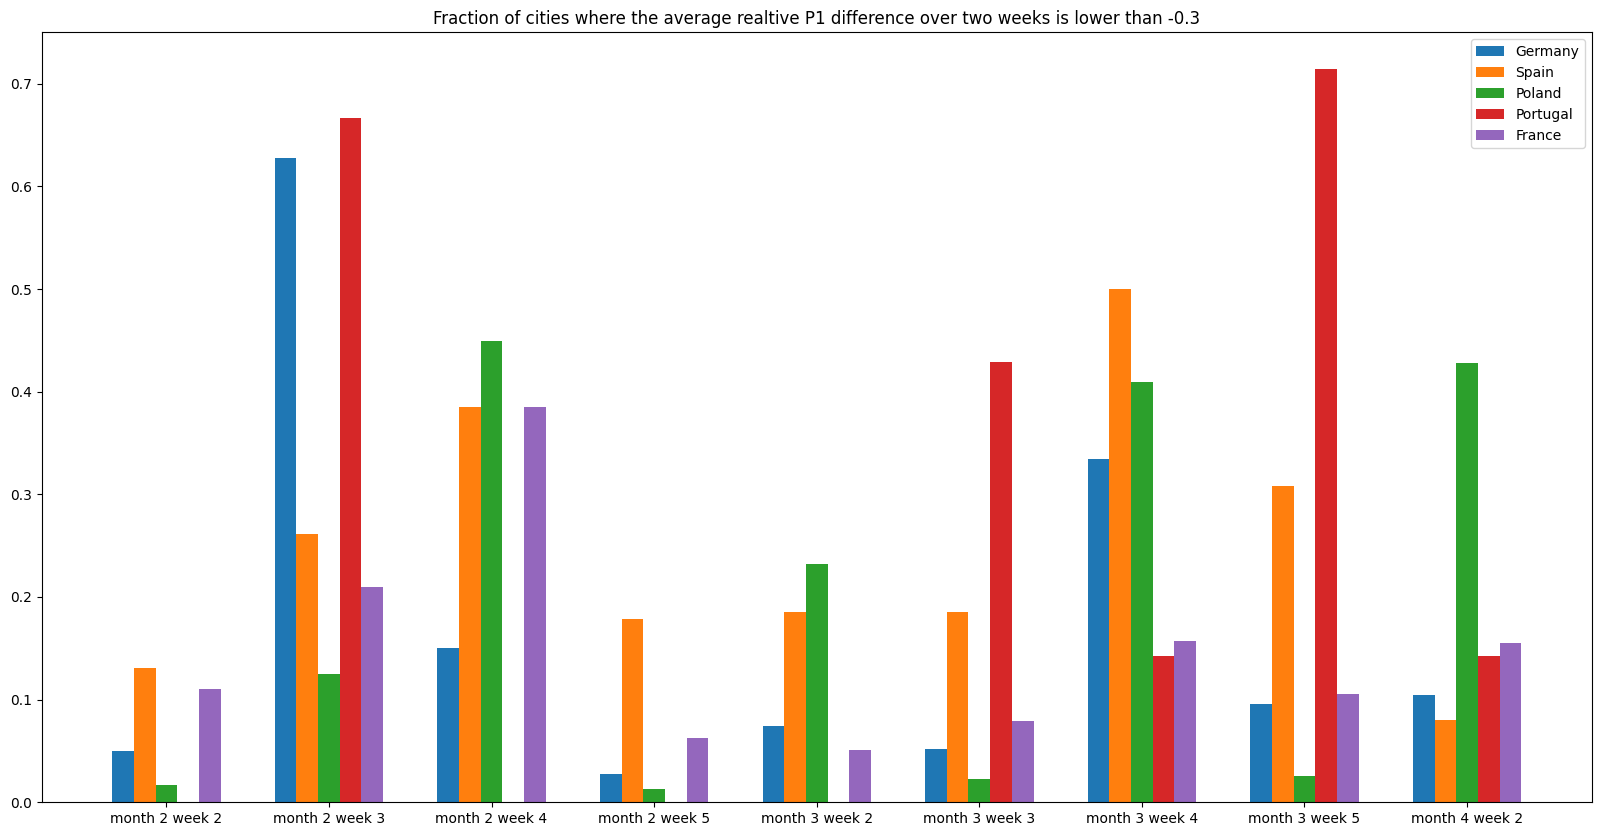

In [62]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 10))
offsets = [-0.8, -0.4, 0.0, 0.4, 0.8]
for (country, it), offset in zip(possible_lockdown_weeks, offsets):
    it = sorted(it, key=lambda x: x[0])
    weeks, diffs = zip(*it)
    weeks = list(map(lambda x: f"month {x // 6} week {x - 6*(x // 6) + 1}", weeks))
    xs = list(map(lambda x: x + offset, range(0, 3 * len(weeks), 3)))
    ax.bar(xs, diffs, width=0.4, label=country)

ax.set_title(
    f"Fraction of cities where the average realtive P1 difference over two weeks is lower than {P1_diff_threshold}"
)
ax.set_xticks(range(0, 3 * len(weeks), 3), weeks)
ax.legend()